In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

from sklearn.model_selection import train_test_split
# from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Define the regression function
def reg(x):
    return 5 * np.sin(x) + 23 * (np.cos(x))**2

In [3]:
# Set seed for reproducibility
np.random.seed(1234)

# Generate data
X = np.random.uniform(5, 15, 100)
y = reg(X) + np.random.normal(0, 5, 100)

In [4]:
X.shape, reg(X).shape, y.shape

((100,), (100,), (100,))

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
X_train.shape,X_test.shape

((80,), (20,))

In [55]:
np.exp(1)

np.float64(2.718281828459045)

In [58]:
def knnr(x, k, X_train, y_train):
    distances = np.abs(X_train - x)
    weights = distances/sum(distances)
    nearest_indices = np.argsort(distances)[:k]
    weights_indices = np.argsort(weights)[:k][::-1]
    return np.dot(y_train[nearest_indices],weights[weights_indices])/np.sum(weights[weights_indices])
def knnr1(x, k, X_train, y_train):
    distances = np.abs(X_train - x)
    nearest_indices = np.argsort(distances)[:k]
    return np.dot(np.exp(-distances[nearest_indices]),y_train[nearest_indices])/np.sum(np.exp(-distances[nearest_indices]))

In [59]:
k = 5
y_pred_test = np.array([knnr1(x, k=k, X_train=X_train, y_train=y_train) for x in X_test])
y_pred_test.shape


(20,)

In [60]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_test))
print("R^2 Score:", r2_score(y_test, y_pred_test))

Mean Squared Error: 25.08545850414007
R^2 Score: 0.763269022631599


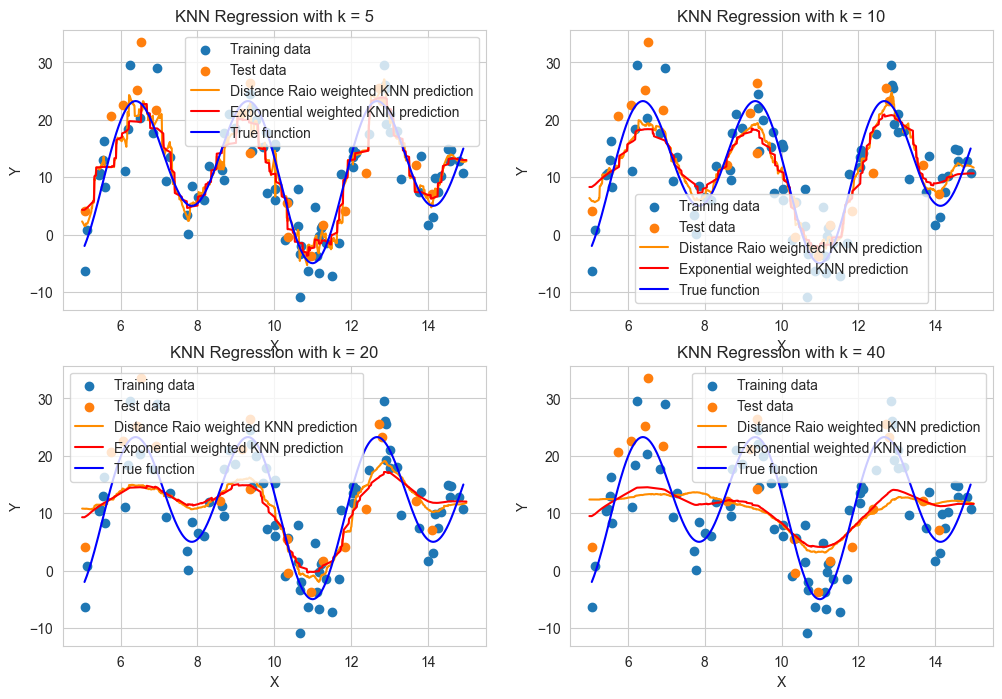

In [62]:

k = [5,10,20,40]

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
ax = ax.flatten()  # Flatten 2x2 grid into 1D list of axes

for i in range(len(k)):
    ax[i].scatter(X_train, y_train, label='Training data')
    ax[i].scatter(X_test, y_test, label='Test data')
    
    X_plot = np.linspace(5, 15, 1000)
    y_plot = np.array([knnr(x, k=k[i], X_train=X_train, y_train=y_train) for x in X_plot])
    ax[i].plot(X_plot, y_plot, color='darkorange', label='Distance Raio weighted KNN prediction')
    y_plot = np.array([knnr1(x, k=k[i], X_train=X_train, y_train=y_train) for x in X_plot])
    ax[i].plot(X_plot, y_plot, color='red', label='Exponential weighted KNN prediction')
    x_curve = np.linspace(X_train.min(), X_train.max(), 500)
    ax[i].plot(x_curve, reg(x_curve), color='blue', label='True function')
    ax[i].set_title(f"KNN Regression with k = {k[i]}")
    ax[i].set_xlabel("X")
    ax[i].set_ylabel("Y")
    ax[i].legend()

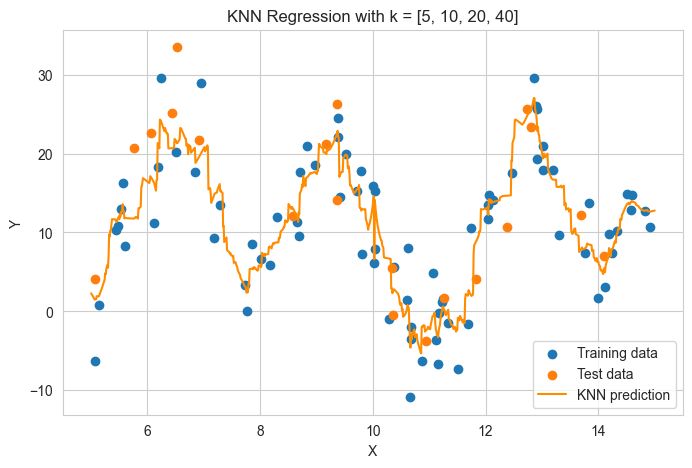

In [52]:
# Predict for plotting

plt.figure(figsize=(8, 5))
plt.scatter(X_train, y_train, label='Training data')
plt.scatter(X_test, y_test, label='Test data')

X_plot = np.linspace(5, 15, 1000)
y_plot = np.array([knnr(x, k=5, X_train=X_train, y_train=y_train) for x in X_plot])
plt.plot(X_plot, y_plot, color='darkorange', label='KNN prediction')
plt.title(f"KNN Regression with k = {k}")
plt.xlabel("X"); plt.ylabel("Y")
plt.legend()
plt.show()

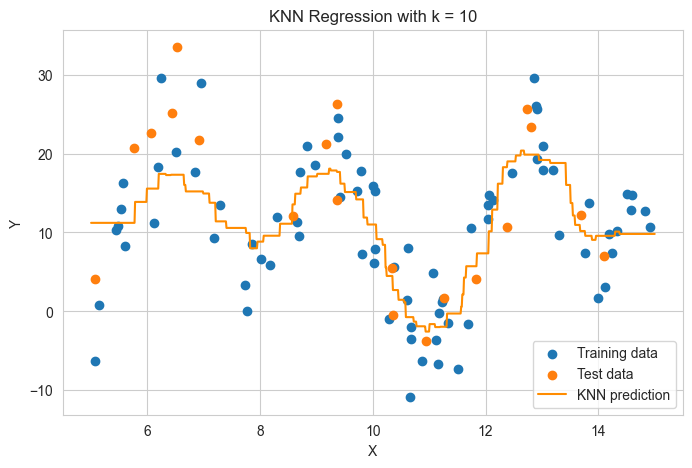

In [13]:
plt.figure(figsize=(8, 5))
plt.scatter(X_train, y_train, label='Training data')
plt.scatter(X_test, y_test, label='Test data')

X_plot = np.linspace(5, 15, 1000)
y_plot = np.array([knnr(x, k=10, X_train=X_train, y_train=y_train) for x in X_plot])
plt.plot(X_plot, y_plot, color='darkorange', label='KNN prediction')
plt.title(f"KNN Regression with k = {10}")
plt.xlabel("X"); plt.ylabel("Y")
plt.legend()
plt.show()

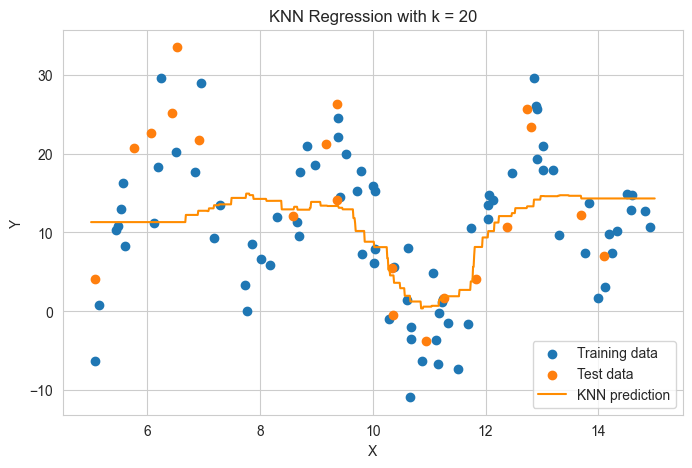

In [14]:
plt.figure(figsize=(8, 5))
plt.scatter(X_train, y_train, label='Training data')
plt.scatter(X_test, y_test, label='Test data')

X_plot = np.linspace(5, 15, 1000)
y_plot = np.array([knnr(x, k=20, X_train=X_train, y_train=y_train) for x in X_plot])
plt.plot(X_plot, y_plot, color='darkorange', label='KNN prediction')
plt.title(f"KNN Regression with k = {20}")
plt.xlabel("X"); plt.ylabel("Y")
plt.legend()
plt.show()

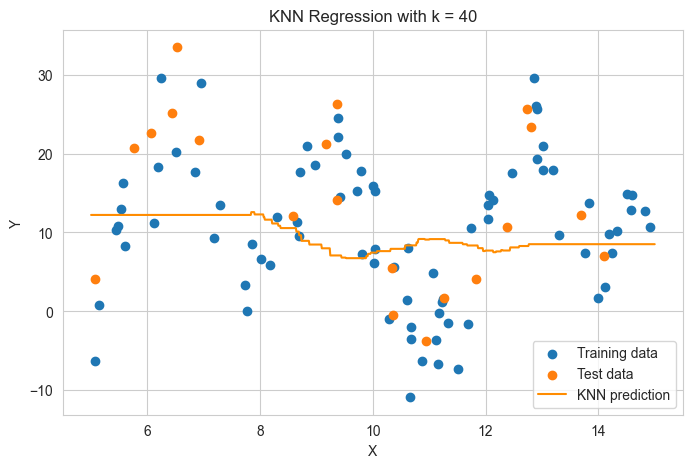

In [15]:
plt.figure(figsize=(8, 5))
plt.scatter(X_train, y_train, label='Training data')
plt.scatter(X_test, y_test, label='Test data')

X_plot = np.linspace(5, 15, 1000)
y_plot = np.array([knnr(x, k=40, X_train=X_train, y_train=y_train) for x in X_plot])
plt.plot(X_plot, y_plot, color='darkorange', label='KNN prediction')
plt.title(f"KNN Regression with k = {40}")
plt.xlabel("X"); plt.ylabel("Y")
plt.legend()
plt.show()

### Repeat the procedure $50$ times and report the avg MSE for various $k$, for Train and test data

In [28]:
Res = []
R = 50

for r in range(R):
    np.random.seed(r)
    # Generate data
    X = np.random.uniform(5, 15, 100)
    y = reg(X) + np.random.normal(0, 5, 100)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # X_train = X[:80]; X_test = X[80:]; y_train = y[:80]; y_test = y[80:]
    
    errs = []
    for k in range(1,21):
        y_pred_train = np.array([knnr(x, k=k, X_train=X_train, y_train=y_train) for x in X_train])
        y_pred_test = np.array([knnr(x, k=k, X_train=X_train, y_train=y_train) for x in X_test])
        
        trn_errs = mean_squared_error(y_train, y_pred_train)
        tst_errs = mean_squared_error(y_test, y_pred_test)
    
        errs.append([trn_errs, tst_errs])
    
    Res.append(errs)

Res_df = pd.DataFrame(np.mean(Res, axis=0), columns=['Avg Train error', 'Avg Test error'])
Res_df.insert(loc=0, column='k', value=np.arange(1,21))
Res_df

,k,Avg Train error,Avg Test error
0,1,0.000000,51.159194
1,2,12.972024,41.041016
2,3,17.757850,36.664700
3,4,20.973392,36.481766
4,5,23.028646,36.821810
5,6,24.784259,35.906306
6,7,26.262941,37.178077
7,8,28.561236,38.716517
8,9,30.972313,40.398652
9,10,33.231768,41.952079


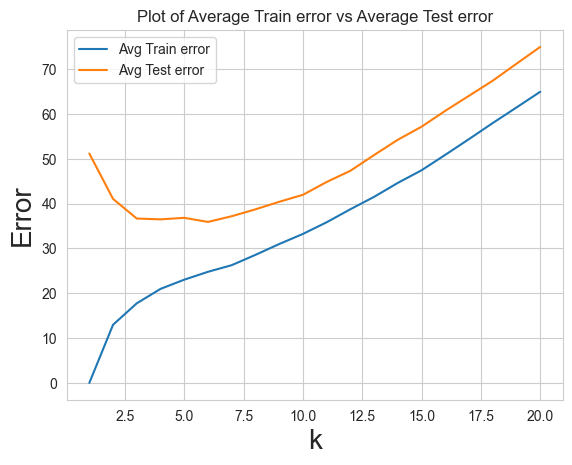

In [29]:
plt.plot(Res_df['k'], Res_df['Avg Train error'],label='Avg Train error')
plt.plot(Res_df['k'], Res_df['Avg Test error'],label='Avg Test error')
plt.xlabel('k', fontsize=20); plt.ylabel('Error', fontsize = 20)
plt.title('Plot of Average Train error vs Average Test error')
plt.legend()